In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#import graphviz 
import timeit
import os
from IPython.display import Image

In [26]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [27]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [28]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [29]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [30]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [31]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [32]:
del adult['education']
del adult['fnlwgt']

In [33]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [34]:
adult = pd.get_dummies(adult, columns=['workclass','marital-status','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])

In [35]:
adult.shape

(45222, 87)

In [37]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(adult, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


In [38]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Check for hyper paramters using max_depth

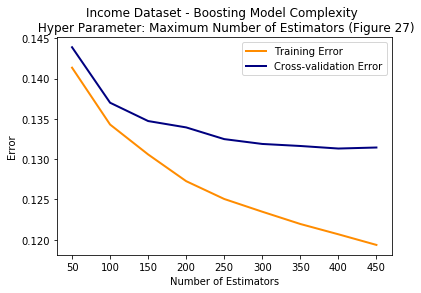

train_scores = [0.85864002 0.86570052 0.86941242 0.87272943 0.87494078 0.87652031
 0.87804455 0.87932398 0.88064288]
test_scores = [0.856105   0.86299182 0.8652663  0.86605606 0.86750924 0.86810952
 0.8683622  0.8686781  0.86855174]
Optimal max depth =  400  Minimum Error =   0.1313219026487129


In [40]:
np.random.seed(55)
classifier = GradientBoostingClassifier()


estimators = np.arange(50,500,50) 
train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="n_estimators", param_range=estimators,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - Boosting Model Complexity \n Hyper Parameter: Maximum Number of Estimators (Figure 27)")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")



lw = 2
plt.plot(estimators, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(estimators, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal max depth = ",  estimators[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )



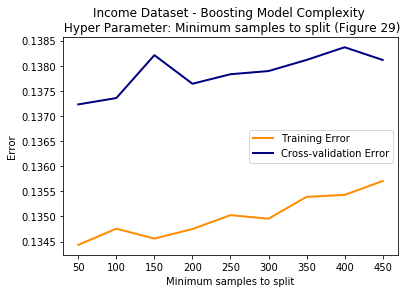

train_scores = [0.86556626 0.86524247 0.86543991 0.86525035 0.86497394 0.86504501
 0.86461064 0.86457115 0.86429474]
test_scores = [0.86277063 0.86264425 0.86179129 0.86235993 0.86217037 0.86210721
 0.86188611 0.86163347 0.86188615]
Optimal value =  50  Minimum Error =   0.13722936724783918


In [43]:
np.random.seed(55)
classifier = GradientBoostingClassifier()
estimators = np.arange(50,500,50) 

train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="min_samples_split", param_range=estimators,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Income Dataset - Boosting Model Complexity \n Hyper Parameter: Minimum samples to split (Figure 29)")
plt.xlabel("Minimum samples to split")
plt.ylabel("Error")


lw = 2
plt.plot(estimators, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(estimators, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal value = ",  estimators[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )




### Create Learning Curve - Sample dataset size vs. Time

[ 0.282138  0.567672  0.816618  1.074116  1.352495  1.657613  1.914706
  2.169381  2.525091  2.757179]
[ 1071.332  1945.012  2699.726  3423.348  4378.141  5025.015  5768.378
  6677.579  7116.114  8171.587]


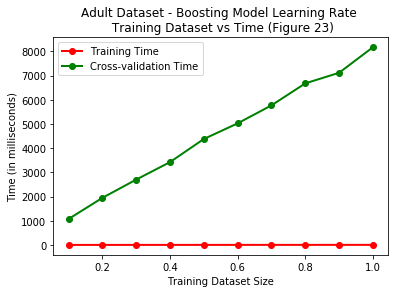

In [71]:
np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


#Create timings for Training Set
estimator = GradientBoostingClassifier()

i=0
times_train=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(X_train)) < sub
    smaller_X_train = X_train[msk]
    smaller_y_train = y_train[msk]
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    estimator.fit(sub_X_train, sub_y_train)
    estimator.predict(sub_X_test)
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    times_train[i] = (duration.microseconds / 1000000) + (duration.seconds)
    i = i + 1
    
print(times_train)

#Create timings for Cross-validation set

i=0
times_cv=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(X_train)) < sub
    smaller_X_train = X_train[msk]
    smaller_y_train = y_train[msk]
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(clf, sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(times_cv)


lw = 2
plt.plot(training_sizes, times_train, 'o-', color="r",
             label="Training Time",  lw=lw)
plt.plot(training_sizes, times_cv, 'o-', color="g",
             label="Cross-validation Time",  lw=lw)


plt.title("Adult Dataset - Boosting Model Learning Rate \n Training Dataset vs Time (Figure 23)")
plt.xlabel('Training Dataset Size')
plt.ylabel('Time (in milliseconds)')
plt.legend(loc="best")
plt.show()        





In [19]:
(np.ndarray.argmax(test_scores_mean)  + 1 ) * 0.1 * len(X_train)

31655.0

### Create learning curve - Sample data set size vs. Error


train_scores = [0.90305478 0.8932245  0.88454248 0.88027205 0.8800337  0.87948868
 0.87881857 0.87764907 0.8774064  0.87817403]
test_scores = [0.85493647 0.86144394 0.86514014 0.86536098 0.86722496 0.86833053
 0.86864661 0.86893102 0.86858349 0.86949975]
train sizes = [ 2848  5697  8546 11395 14244 17093 19942 22791 25640 28489]


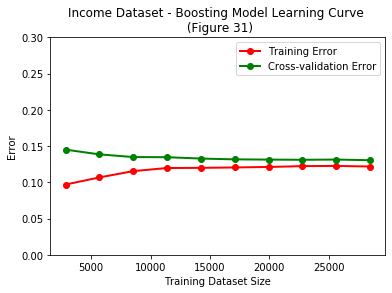

In [44]:
np.random.seed(55)
#Create timings for Training Set
estimator = GradientBoostingClassifier(n_estimators = 400, min_samples_split = 50 )
st_train_time = timeit.default_timer() 
estimator.fit(X_train, y_train)
end_train_time = timeit.default_timer() 

title = "Income Dataset - Boosting Model Learning Curve \n (Figure 31)"
ylim=(0.0, 0.3)


plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=10, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()




### Predict on Testing set

In [45]:
st_pred_time = timeit.default_timer() 
y_pred = estimator.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)


Accuracy: 85.98805926144321%
[[9564  591]
 [1310 2102]]
              precision    recall  f1-score   support

           y       0.88      0.94      0.91     10155
           n       0.78      0.62      0.69      3412

    accuracy                           0.86     13567
   macro avg       0.83      0.78      0.80     13567
weighted avg       0.85      0.86      0.85     13567

AUC = 0.7789315146299185
Prediction Time =  0.11027449999892269
Training Time =  22.388634799999636


In [ ]:
estimator.n_features_